<a href="https://colab.research.google.com/github/shahar-lazarev/ML_assignments/blob/main/Assignment_2_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

In [104]:
iris = sklearn.datasets.load_iris()
X = iris["data"][:, 2:]
y = (iris["target"] == 0).astype(np.int)

# print(X)
# y[:]

In [105]:
sigmoid = lambda x: 1/(1+np.exp(-x))

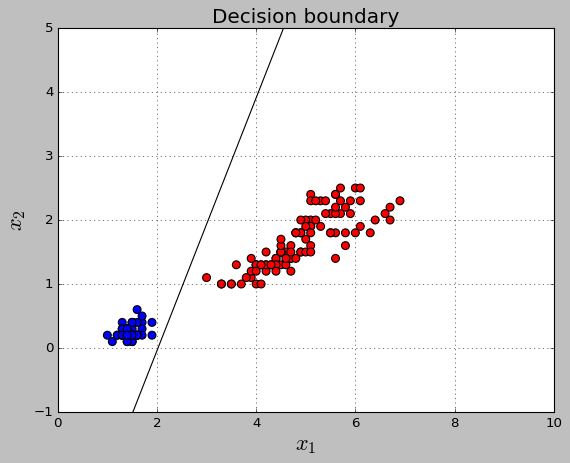

In [106]:
LEARNING_RATE = 30.0
NUM_EPOCHS = 10

def get_loss(y, a):
  return -1 * (y * np.log(a) +
               (1-y) * np.log(1-a))

def get_loss_numerically_stable(y, z):
   return -1 * (y * -1 * np.log(1 + np.exp(-z)) +
                (1-y) * (-z - np.log(1 + np.exp(-z))))
   
def plot_scatter(X, y, colormap, path):
  plt.grid()
  plt.xlim([0.0, 10.0])
  plt.ylim([-1.0, 5.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])
  plt.savefig(path)

def plot_decision_boundary(X, y, w, b, path):
   plt.grid()
   plt.xlim([0.0, 10.0])
   plt.ylim([-1.0, 5.0])
   plt.xlabel('$x_1$', size=20)
   plt.ylabel('$x_2$', size=20)
   plt.title('Decision boundary', size = 18)

   xs = np.array([-20.0, 20.0])
   ys = (-w[0] * xs - b)/w[1]

   plt.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
   
   plt.plot(xs, ys, c='black')
   plt.savefig(path)

w_cache = []
b_cache = []
l_cache = []

colormap = np.array(['r', 'b'])
# colormap = np.array(['set', 'vers', 'vir'])

# some nice initial value, so that the plot looks nice.
w = np.array([-4.0, 29.0])
b = 0.0

for i in range(NUM_EPOCHS):
  dw = np.zeros(w.shape)
  db = 0.0
  loss = 0.0

  for j in range(X.shape[0]):
    x_j = X[j,:]
    y_j = y[j]

    z_j = w.dot(x_j) + b
    a_j = sigmoid(z_j)

    loss_j = get_loss_numerically_stable(y_j, z_j)

    dw_j = x_j * (a_j-y_j)
    db_j = a_j - y_j

    dw += dw_j
    db += db_j
    loss += loss_j

  # because we have 150 samples
  dw = (1.0/150) * dw
  db = (1.0/150) * db
  loss = (1.0/150) * loss

  w -= LEARNING_RATE * dw
  b -= LEARNING_RATE * db

  w_cache.append(w.copy())
  b_cache.append(b)
  l_cache.append(loss)


plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

# plot_scatter(X, y, colormap, 'image.png')
plot_decision_boundary(X, y, w_cache[-1], b_cache[-1], 'image.png')
# plt.savefig('image.png')


# plt.close()
# plt.clf()
# plt.cla()

  

# plt.xlim(0,10)
# plt.ylim(0,10)
# plt.grid()
# plt.title('Loss', size=18)
# plt.xlabel('Number of iterations', size=15)
# plt.ylabel('Loss',: size=15)
# plt.plot(l_cache)

# plt.savefig('image.png')